# Pima Indian Diabetes Classification

## Dataset Description

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage.

Link:- [Pima Indian Diabetes Dataset](https://www.kaggle.com/uciml/pima-indians-diabetes-database)  
  
The reason for choosing this dataset is because this is medical and can help many people that are suffering from diabetes as the dataset is given by our government. I could have also chosen the popular covid-19 dataset but since it is so popular, it will be impossible to express my genuinity as most of the work is available for free on github and kaggle and can be easily plagiarized.

# Loading the Dataset

In [1]:
import pandas as pd #pandas for dataframe loading
import numpy as np #numpy for dealing with numbers(in this notebook, I only use numpy for filling nan values)

In [2]:
df = pd.read_csv("diabetes.csv") #read the dataset

# Exploratory Data Analysis

In [3]:
df.head() #take a look at the dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info() #this function shows the datatype and nan values for each column in dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset doesn't seem to have any NA values but most of the time NA values are replaced by -1 or -999 so let's go more in depth and find out

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Minimum values for Glucose, BloodPressure, SkinThickness, Insulin and BMI can't be 0 unless the person is dead and decomposed.  
  
The only logical reason I can think of is that NA values have been replaced by 0.

In [6]:
df.shape

(768, 9)

This is a very small dataset so high bias models like linear models are to be avoided while training the data

In [7]:
na_cols = df.columns[df.describe().loc["min"] == 0][1:6] #Get all the columns with minimum value 0 except Pregnancies and Outcome column

In [8]:
replace_0 = lambda x: np.nan if x == 0 else x #lambda function for replacing 0 with NA

In [9]:
for col in na_cols:
    df[col] = df[col].map(replace_0) # map the lambda function to each of the columns in na_cols

In [10]:
df.info() # now let's check the proper info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


This NA information is still not satisfying for me so let's draw a graph

In [11]:
import matplotlib.pyplot as plt #plotting library
import seaborn as sns #plotting library with additional features and beautiful graphs

<AxesSubplot:>

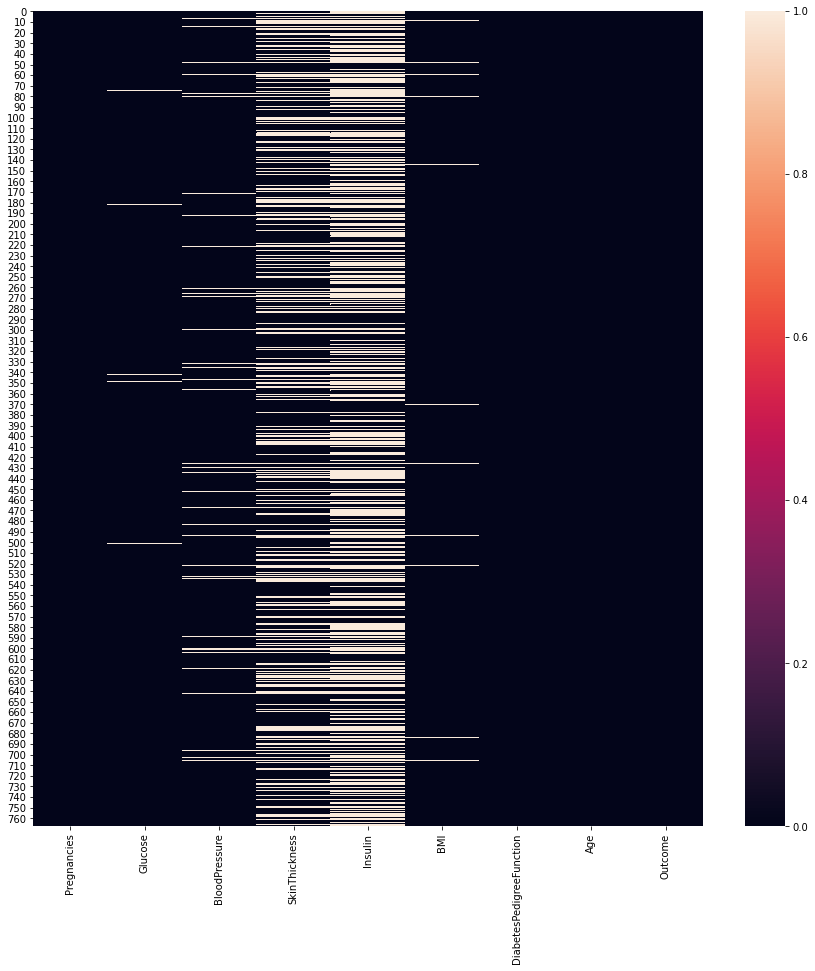

In [12]:
_, ax = plt.subplots(figsize=(15,15))
sns.heatmap(df.isnull(), ax = ax) # plot a null value heatmap

There does not seem to be any pattern here for NA values and also the Insulin column seems to have a lot of NA values however this is not enough to drop the column unless we also compare the correlation.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

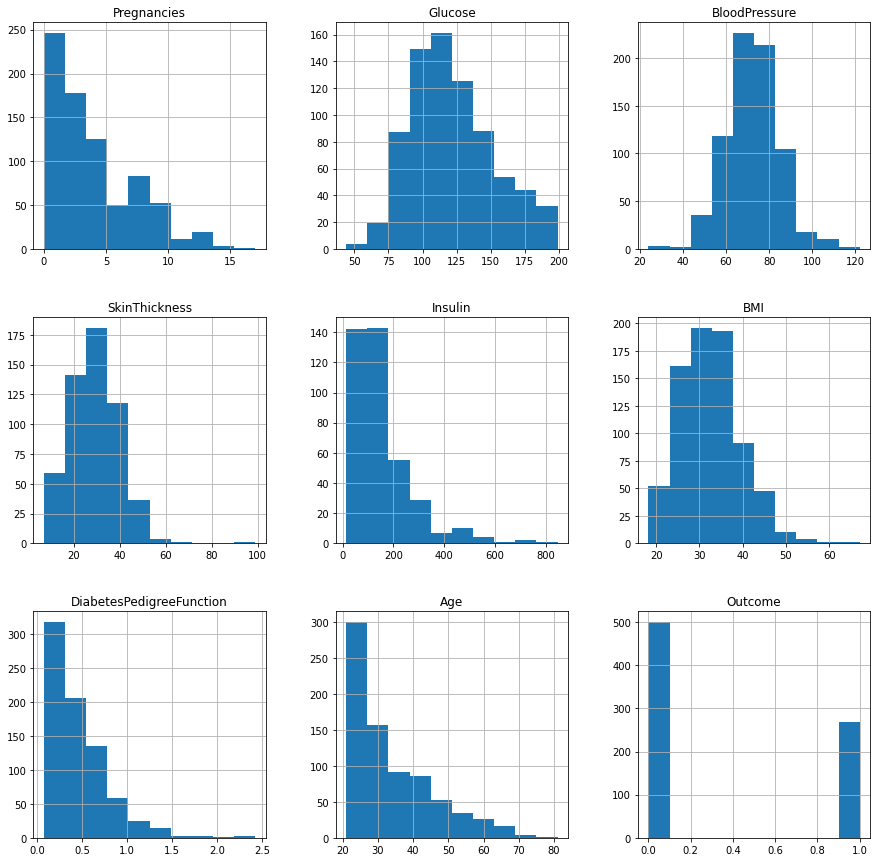

In [13]:
df.hist(figsize=(15,15)) # draw histograms for all columns

There seems to something wrong with 'Glucose' and 'BloodPressure' columns. Glucose below 70 is considered highly dangerous and BP cannot be less than 60(assuming this is diastolic). These are wrong values and I will replace them with NA.

In [14]:
replace_glucose_70 = lambda x: np.nan if x < 70 else x #lambda for replacing Glucose values below 70 with np.nan
replace_bp_60 = lambda x: np.nan if x <60 else x #lambda for replacing BloodPressure values below 60 with np.nan

#map the lambda functions to respective columns
df["Glucose"] = df["Glucose"].map(replace_glucose_70) 
df["BloodPressure"] = df["BloodPressure"].map(replace_bp_60)

Now let's impute the NA values. I have drawn histogram for each columns above and there are some histograms which look almost gaussian.

For the columns that look gaussian(Glucose, SkinThickness, BMI) I will be imputing NA values with mean and for other columns(BloodPressure, Insulin) I will be imputing with median.

In [15]:
df["Glucose"].fillna(df["Glucose"].mean(), inplace=True)
df["SkinThickness"].fillna(df["SkinThickness"].mean(), inplace=True)
df["BMI"].fillna(df["BMI"].mean(), inplace=True)

df["BloodPressure"].fillna(df["BloodPressure"].median(), inplace=True)
df["Insulin"].fillna(df["Insulin"].median(), inplace=True)

In [16]:
df.info() #now let's look at the info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


There does not seem to be any null values now and I believe the dataset is complete for more in-depth EDA

<AxesSubplot:>

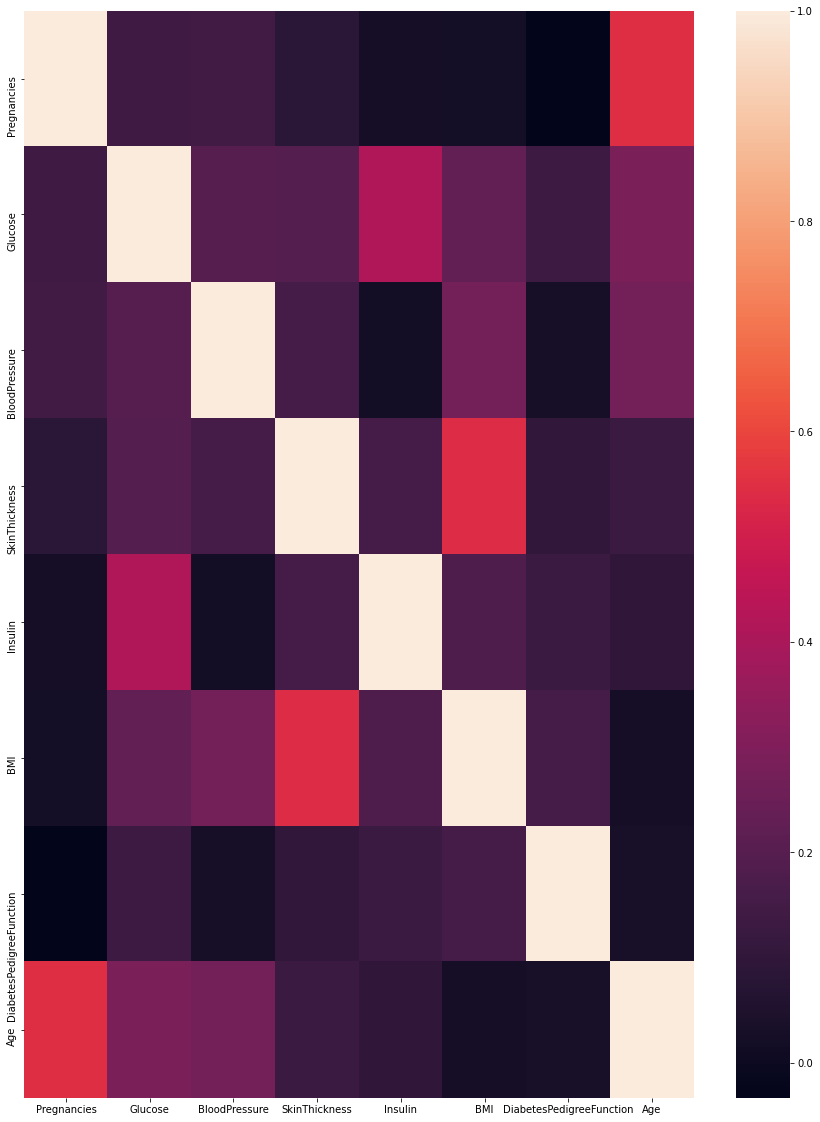

In [17]:
_,ax = plt.subplots(figsize=(15,20))
sns.heatmap(df[df.columns[:-1]].corr()) #draw the correlation heatmap for all columns except Outcome(Outcome is binary categorical and hence pearson correlation wouldn't make sense)

We can't remove the Insulin column as Glucose and Insulin have correlation. Insulin is used for glucose control and that might be the reason why.
Also pregnancy and age also seem to have a correlation along with BMI and skin thickness. The correlations seem to make sense.

## Pregnancies

In [18]:
df["Pregnancies"].value_counts() #check all values of pregnancies and get their counts

1     135
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
13     10
12      9
14      2
15      1
17      1
Name: Pregnancies, dtype: int64

There seem to be people with more than 10 pregnancies as well, to check the genuineness of the value, we can check the age as I believe it is impossible for people with less age(less than 25) to have more than 10 pregnancies.

In [19]:
df["Age"][df["Pregnancies"] == 17] #check the age for woman with 17 pregnancies

159    47
Name: Age, dtype: int64

Okay the age kind of seems to make sense

In [20]:
df["Age"][df["Pregnancies"] == 13] #Let's check people with 13 pregnancies

28     57
72     42
86     45
274    52
323    43
357    44
518    41
635    38
691    44
744    39
Name: Age, dtype: int64

The age seems to make sense here meaning the data might be genuine.

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

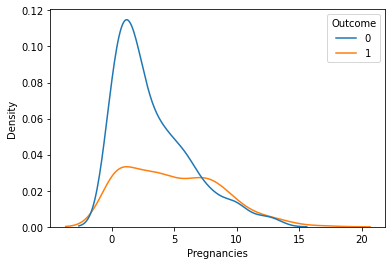

In [21]:
sns.kdeplot(data = df, x = "Pregnancies", hue="Outcome") #k density plot for different values of Outcome columns

It seems that people with low pregnancies have lower risk of diabetes. This might help in classification

## Glucose

<AxesSubplot:xlabel='Glucose', ylabel='Density'>

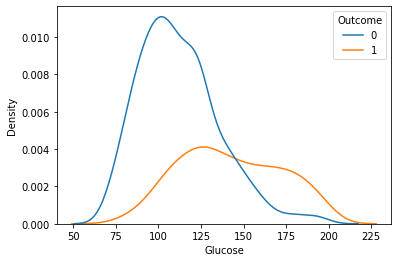

In [22]:
sns.kdeplot(data=df, x="Glucose", hue="Outcome") # k density plot of Glucose for different Outcome value. 

Seems like people with diabetes have less glucose. Infact I think that is what the diabetes disease does.  
No more data can be extracted from this column. 

## BloodPressure

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

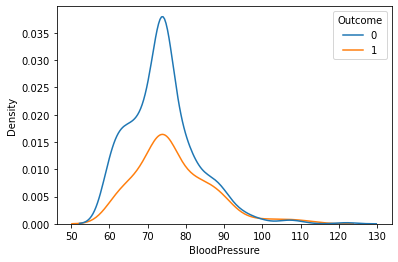

In [23]:
sns.kdeplot(data = df, x = "BloodPressure", hue="Outcome")# k density plot of BloodPressure for different Outcome value. 

There doesn't seem to be much of a difference in BP between people with diabetes and healthy people. Maybe age factor might affect it.  

There are a lot of age values but we can put them into different categories and then analyze the BP values according to the categories 

In [24]:
bins = [0,20,30,40,50,60,70,80,100] #different bins for age values for analyzing BP with age.
labels = ["0-20", "20-30","30-40","40-50","50-60","60-70","70-80","80+"] # Row values
df["AgeCategories"] = pd.cut(df["Age"], bins, labels = labels) #Create new column AgeCategories to analyze BP with age

C:\Users\govind\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\govind\AppData\Local\Programs\Python\Python36\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

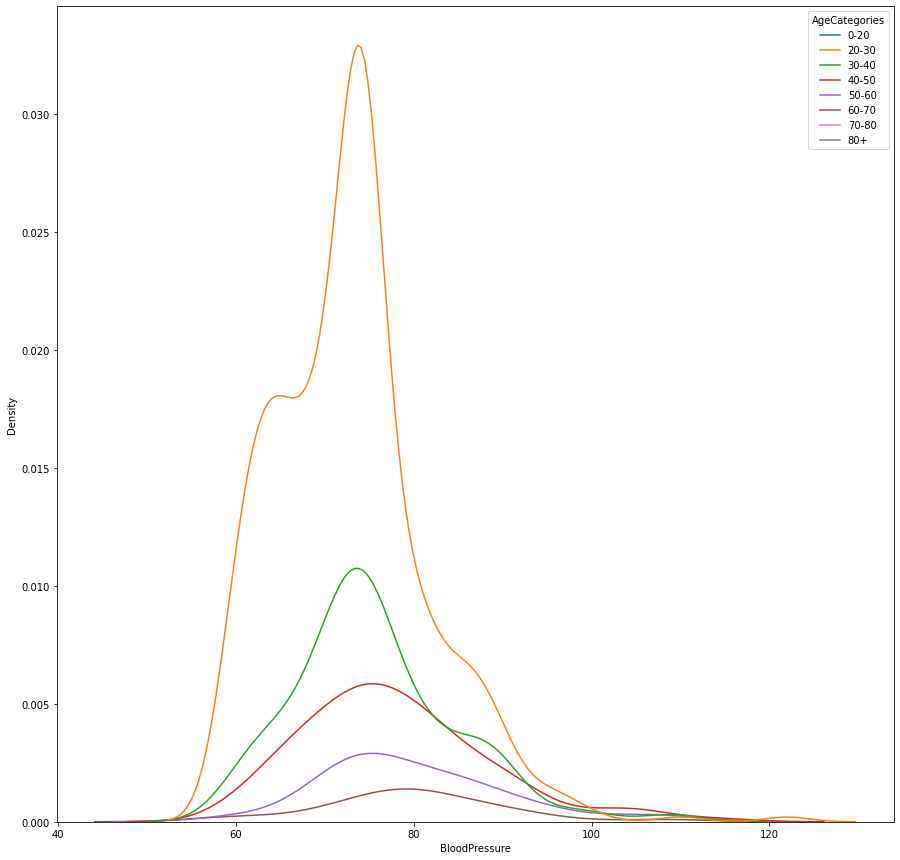

In [25]:
_,ax = plt.subplots(figsize=(15,15))
sns.kdeplot(data = df, x = "BloodPressure", hue="AgeCategories", ax=ax) # k density plot of BloodPressure for different AgeCategories value. 

We see increasing BloodPressure with increasing Age.

## Insulin

<AxesSubplot:xlabel='Insulin', ylabel='Density'>

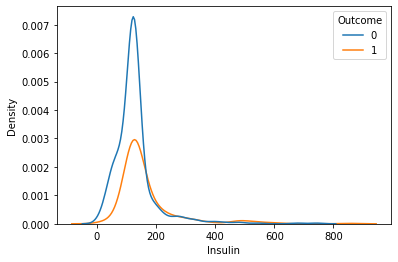

In [26]:
sns.kdeplot(data=df, x = "Insulin", hue="Outcome")# k density plot of Insulin for different Outcome values 

People with high Insulin seem to have Diabetes. We can use this for classification.  
  
The large number in the middle corresponds to NA values which we have imputed with median.

## BMI

<AxesSubplot:xlabel='BMI', ylabel='count'>

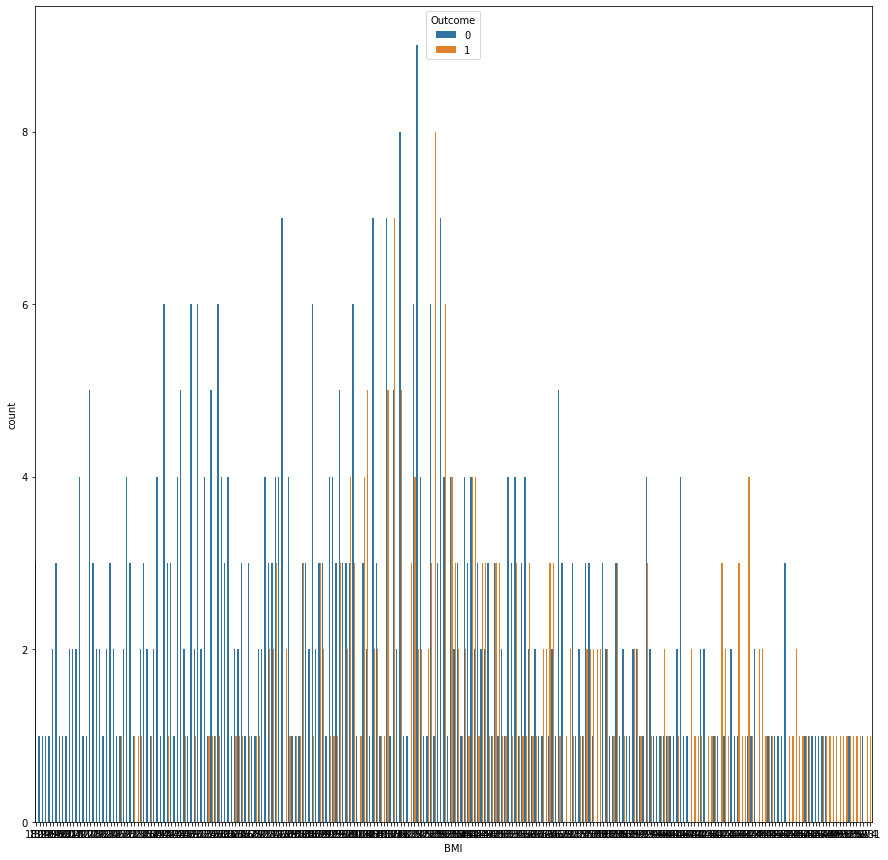

In [27]:
_,ax = plt.subplots(figsize=(15,15))
sns.countplot(data =df, x= "BMI", hue="Outcome", ax=ax) #countplot for BMI for different Outcome Values

This graph doesn't seem to give out much information at first but if u look closely we see more blue values on left and more yellow values on right meaning more BMI might give diabetes. 

# Model Training

## Train-Test Split

In [28]:
df.drop(["AgeCategories"], axis=1, inplace=True)#drop this column as we dont need it anymore

In [29]:
X = df.drop(["Outcome"], axis=1)#X dataset
Y = df["Outcome"]#Y dataset

In [30]:
from sklearn.model_selection import train_test_split #library for splitting
from sklearn.metrics import accuracy_score# library for metric, we will be using accuracy score to judge our model
x_train, x_test, y_train, y_test = train_test_split(X, Y,  random_state= 123 ) #split the data into training and testing , seed value is 123 for reproduction purposes

## Scaling the data

We will use standard scaler so that our columns have mean 0 and standard deviation of 1.

In [31]:
from sklearn.preprocessing import StandardScaler#Scaling library
scaler = StandardScaler()#define scaler object
x_train = scaler.fit_transform(x_train)#use the train data for learning and scale it
x_test = scaler.transform(x_test)#scale the test data using train parameters

## Training the Model

### LightGBM(Supervised algorithm)

In [32]:
from lightgbm import LGBMClassifier #LightGBM library
lgb = LGBMClassifier(boosting_type="dart", num_leaves=6, max_depth=5, learning_rate=0.123,n_estimators=200)#define object with hyperparameters(tuned according to test set)
lgb.fit(x_train,y_train) #fit the training set
accuracy_score(lgb.predict(x_test), y_test) #give final score according to test set

0.796875

### K Means Classification(Unsupervised algorithm)

In [33]:
from sklearn.neighbors import KNeighborsClassifier #KNN library
knn = KNeighborsClassifier(n_neighbors=9) #define object with hyperparameters(tuned according to test set)
knn.fit(x_train, y_train) #fit the training set
accuracy_score(knn.predict(x_test), y_test)#give final score according to test set

0.796875

Both models seem to give an accuracy of roughly 80%. 